In [1]:
import pandas as pd
# import seaborn as sns
# from sklearn import tree
# import numpy as np


In [2]:
from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

dataset_three.csv
numeric_one.csv
numeric_three_extended.csv
numeric_three_extended_normalized.csv
numeric_three_extended_normalized_final.csv
numeric_two_extrafeatures.csv
test.csv
train.csv
train_new_innerjoin.csv
train_new_leftjoin.csv
train_new_numeric.csv



In [3]:
# the second level dataset with 3 new features - description_size, project_duration, creation_to_launch
train_data = pd.read_csv("data/numeric_two_extrafeatures.csv")

In [4]:
train_data.shape

(108129, 17)

In [5]:
train_data.describe()

,description_size,goal,disable_communication,country,backers_count,final_status,project_duration,creation_to_launch
count,108121.000000,1.081290e+05,108129.000000,108129.000000,108129.000000,108129.000000,108129.000000,108129.000000
mean,134.105502,3.672623e+04,0.002987,8.973273,123.516661,0.319627,33.917034,37.273405
std,79.376798,9.719027e+05,0.054574,2.577460,1176.745162,0.466334,12.936361,87.148811
min,1.000000,1.000000e-02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,107.000000,2.000000e+03,0.000000,10.000000,2.000000,0.000000,30.000000,3.000000
50%,126.000000,5.000000e+03,0.000000,10.000000,17.000000,0.000000,30.000000,10.000000
75%,133.000000,1.300000e+04,0.000000,10.000000,65.000000,1.000000,36.000000,32.000000
max,1268.000000,1.000000e+08,1.000000,10.000000,219382.000000,1.000000,91.000000,1903.000000


In [6]:
train_data.head(1)

,project_id,name,desc,description_size,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,project_duration,creation_to_launch
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,drawing-for-dollars,0.0,10,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,8,0


# Merge:

numeric_two_extrafeatures.csv with dataset_three.csv

1. join tables on project_id (remove the kkst prefix) and id - didn't work'

2. join (inner) tables on 'name' - worked - reduced data size to 83K examples.

In [7]:
dataset_three = pd.read_csv('data/dataset_three.csv')

/home/nahmed/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
dataset_three.shape

(169832, 33)

In [9]:
dataset_three.head(1)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,1762037418,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",The danger of plastics in our oceans,Artwork creating a powerful statement about th...,10000.0,2.0,failed,the-danger-of-plastics-in-our-oceans,False,US,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


# innerjoin 

Inner join on 'name' returned 83086 rows.

In [10]:
# not including the 'name' for columns of right table gave - keyerror.
merged_train = pd.merge(train_data,
                        dataset_three,
                         on='name')
# --- Selected columns ----------------------------
# merged_train = pd.merge(train_copy,
#                         dataset_three[['name', 'photo', 'pledged', 'state', 'staff_pick', 
#                              'is_starrable', 'static_usd_rate', 'usd_pledged', 'creator', 
#                              'category', 'profile', 'spotlight', 'is_backing', 'is_starred']],
#                          on='name')
# --------------------------------------------------

merged_train.head(1)

,project_id,name,desc,description_size,goal_x,keywords,disable_communication_x,country_x,currency_x,deadline_x,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,drawing-for-dollars,0.0,10,USD,2009-05-03 06:59:59,...,NaN,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


In [11]:
merged_train.shape

(83096, 49)

In [12]:
# print all the data types of the features:
print(merged_train.dtypes)

project_id                  object
name                        object
desc                        object
description_size           float64
goal_x                     float64
keywords                    object
disable_communication_x    float64
country_x                    int64
currency_x                  object
deadline_x                  object
state_changed_at_x          object
created_at_x                object
launched_at_x               object
backers_count_x              int64
final_status                 int64
project_duration             int64
creation_to_launch           int64
id                           int64
photo                       object
blurb                       object
goal_y                     float64
pledged                    float64
state                       object
slug                        object
disable_communication_y       bool
country_y                   object
currency_y                  object
currency_symbol             object
currency_trailing_co

# Remove Duplicates 

In [13]:
# dup_columns = merged_train.filter(regex='e$', axis=1).columns
dup_columns = merged_train.filter(like='_y', axis=1).columns

print(dup_columns)

Index([u'goal_y', u'disable_communication_y', u'country_y', u'currency_y',
       u'deadline_y', u'state_changed_at_y', u'created_at_y', u'launched_at_y',
       u'backers_count_y'],
      dtype='object')


In [14]:
train_copy = merged_train.copy()

In [15]:
train_copy.drop(dup_columns, axis=1, inplace=True)
print(train_copy.dtypes)


project_id                  object
name                        object
desc                        object
description_size           float64
goal_x                     float64
keywords                    object
disable_communication_x    float64
country_x                    int64
currency_x                  object
deadline_x                  object
state_changed_at_x          object
created_at_x                object
launched_at_x               object
backers_count_x              int64
final_status                 int64
project_duration             int64
creation_to_launch           int64
id                           int64
photo                       object
blurb                       object
pledged                    float64
state                       object
slug                        object
currency_symbol             object
currency_trailing_code        bool
staff_pick                    bool
is_starrable                  bool
static_usd_rate            float64
usd_pledged         

# Renaming columns

In [16]:
train_copy.rename(columns={'goal_x': 'goal', 'disable_communication_x': 'disable_communication',
                           'country_x': 'country', 'currency_x': 'currency', 'deadline_x': 'deadline', 
                           'state_changed_at_x': 'state_changed_at', 'created_at_x': 'created_at',
                           'launched_at_x': 'launched_at', 'backers_count_x': 'backers_count'
                          }, inplace=True)
print(train_copy.dtypes)


project_id                 object
name                       object
desc                       object
description_size          float64
goal                      float64
keywords                   object
disable_communication     float64
country                     int64
currency                   object
deadline                   object
state_changed_at           object
created_at                 object
launched_at                object
backers_count               int64
final_status                int64
project_duration            int64
creation_to_launch          int64
id                          int64
photo                      object
blurb                      object
pledged                   float64
state                      object
slug                       object
currency_symbol            object
currency_trailing_code       bool
staff_pick                   bool
is_starrable                 bool
static_usd_rate           float64
usd_pledged               float64
creator       

In [17]:
train_copy.head(1)

,project_id,name,desc,description_size,goal,keywords,disable_communication,country,currency,deadline,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,drawing-for-dollars,0.0,10,USD,2009-05-03 06:59:59,...,NaN,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


In [18]:
# Goal to USD 
train_copy.insert(5, 'goal_usd', (train_copy.static_usd_rate * train_copy.goal))
train_copy.head(1)

,project_id,name,desc,description_size,goal,goal_usd,keywords,disable_communication,country,currency,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,20.0,drawing-for-dollars,0.0,10,USD,...,NaN,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


# Blurb

Probably the desciption equivalent 

In [19]:
train_copy.columns.get_loc("blurb")

20

In [20]:
# train_copy.drop('blurb_size', axis=1, inplace=True)
train_copy.insert(21, 'blurb_size', train_copy.blurb.str.len())

In [21]:
print(train_copy.blurb_size.max())
print(train_copy.blurb_size.min())
print(train_copy.blurb_size.mean())
print(train_copy.blurb_size[train_copy.final_status == 1].mean())  # average backers for successful projects
print(train_copy.blurb_size[train_copy.final_status == 0].mean())  # average backers for failed projects


221.0
1.0
114.067668087
114.887562019
113.622760273


# Category extraction 

In [22]:
categories = [eval(d) for d in train_copy.category]
print(categories[:2])

[{'name': 'Illustration', 'color': 16760235, 'slug': 'art/illustration', 'parent_id': 1, 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/art/illustration'}}, 'position': 4, 'id': 22}, {'name': 'Illustration', 'color': 16760235, 'slug': 'art/illustration', 'parent_id': 1, 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/art/illustration'}}, 'position': 4, 'id': 22}]


In [23]:
sub_category = [c['name'] for c in categories]
print(sub_category[:3])
print(len(sub_category))

['Illustration', 'Illustration', 'Fiction']
83096


In [24]:
main_category = [c['slug'].split('/')[0] for c in categories]
print(main_category[:3])
print(len(main_category))

['art', 'art', 'publishing']
83096


In [25]:
train_copy.columns.get_loc("category")

33

In [26]:
train_copy.insert(34, 'sub_category', sub_category)
print(len(train_copy.sub_category.unique()))
train_copy.insert(34, 'main_category', main_category)
print(len(train_copy.main_category.unique()))

143
15


In [27]:
print(train_copy.dtypes)


project_id                 object
name                       object
desc                       object
description_size          float64
goal                      float64
goal_usd                  float64
keywords                   object
disable_communication     float64
country                     int64
currency                   object
deadline                   object
state_changed_at           object
created_at                 object
launched_at                object
backers_count               int64
final_status                int64
project_duration            int64
creation_to_launch          int64
id                          int64
photo                      object
blurb                      object
blurb_size                float64
pledged                   float64
state                      object
slug                       object
currency_symbol            object
currency_trailing_code       bool
staff_pick                   bool
is_starrable                 bool
static_usd_rat

# Boolean to Numerical:

spotlight, staff_pick, is_starrable, disable_communication

In [28]:
bool_columns = train_copy.select_dtypes(['bool']).columns
# int_columns = train_innerjoin.select_dtypes(['int']).columns

print(bool_columns)
# traintrain_innerjoin.spotlight.astype(int)

Index([u'currency_trailing_code', u'staff_pick', u'is_starrable',
       u'spotlight'],
      dtype='object')


In [29]:
train_copy[bool_columns] = train_copy[bool_columns].apply(lambda x: x.astype(int))
print(train_copy.dtypes)

project_id                 object
name                       object
desc                       object
description_size          float64
goal                      float64
goal_usd                  float64
keywords                   object
disable_communication     float64
country                     int64
currency                   object
deadline                   object
state_changed_at           object
created_at                 object
launched_at                object
backers_count               int64
final_status                int64
project_duration            int64
creation_to_launch          int64
id                          int64
photo                      object
blurb                      object
blurb_size                float64
pledged                   float64
state                      object
slug                       object
currency_symbol            object
currency_trailing_code      int64
staff_pick                  int64
is_starrable                int64
static_usd_rat

# Object to numerical 

In [31]:
# train_innerjoin["cat_tmp"] = train_innerjoin["main_category"].astype('category')
# train_innerjoin.drop('cat_tmp', axis=1, inplace=True)
# print(train_innerjoin.dtypes)
train_copy["main_category"] = train_copy["main_category"].astype('category')
train_copy["sub_category"] = train_copy["sub_category"].astype('category')
train_copy["is_starred"] = train_copy["is_starred"].astype('category')
train_copy["is_backing"] = train_copy["is_backing"].astype('category')



train_copy.head(1)

,project_id,name,desc,description_size,goal,goal_usd,keywords,disable_communication,country,currency,...,main_category,sub_category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,20.0,drawing-for-dollars,0.0,10,USD,...,art,Illustration,"{""background_image_opacity"":0.8,""should_show_f...",1,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


In [32]:
print(train_copy.dtypes)

project_id                  object
name                        object
desc                        object
description_size           float64
goal                       float64
goal_usd                   float64
keywords                    object
disable_communication      float64
country                      int64
currency                    object
deadline                    object
state_changed_at            object
created_at                  object
launched_at                 object
backers_count                int64
final_status                 int64
project_duration             int64
creation_to_launch           int64
id                           int64
photo                       object
blurb                       object
blurb_size                 float64
pledged                    float64
state                       object
slug                        object
currency_symbol             object
currency_trailing_code       int64
staff_pick                   int64
is_starrable        

In [33]:
# extract the categorical attributes
cat_columns = train_copy.select_dtypes(['category']).columns
print(cat_columns)

Index([u'main_category', u'sub_category', u'is_starred', u'is_backing'], dtype='object')


In [34]:
# the conversion 
train_copy[cat_columns] = train_copy[cat_columns].apply(lambda x: x.cat.codes)
print(train_copy.dtypes)

project_id                 object
name                       object
desc                       object
description_size          float64
goal                      float64
goal_usd                  float64
keywords                   object
disable_communication     float64
country                     int64
currency                   object
deadline                   object
state_changed_at           object
created_at                 object
launched_at                object
backers_count               int64
final_status                int64
project_duration            int64
creation_to_launch          int64
id                          int64
photo                      object
blurb                      object
blurb_size                float64
pledged                   float64
state                      object
slug                       object
currency_symbol            object
currency_trailing_code      int64
staff_pick                  int64
is_starrable                int64
static_usd_rat

In [35]:
print(train_copy.is_backing.value_counts())

-1    83096
Name: is_backing, dtype: int64


In [36]:
print(train_copy.is_starrable.value_counts())

0    83077
1       19
Name: is_starrable, dtype: int64


In [37]:
print(train_copy.is_starred.value_counts())

-1    83096
Name: is_starred, dtype: int64


In [38]:
train_copy["permissions"] = train_copy["permissions"].astype('category')
train_copy["permissions"] = train_copy.permissions.cat.codes
print(train_copy.permissions.value_counts())

-1    83096
Name: permissions, dtype: int64


# Fill empty cells - NaN


In [39]:
train_copy.spotlight = train_copy.spotlight.fillna(0)
train_copy.staff_pick = train_copy.staff_pick.fillna(0)
train_copy.description_size = train_copy.description_size.fillna(0)
train_copy.is_starred= train_copy.is_starred.fillna(0)

# Saving - numeric_three_extended

In [40]:
train_copy.to_csv('data/numeric_three_extended.csv', index=False)  # index=False otherwise adds 'Unnamed' index

In [41]:
train_copy.dtypes

project_id                 object
name                       object
desc                       object
description_size          float64
goal                      float64
goal_usd                  float64
keywords                   object
disable_communication     float64
country                     int64
currency                   object
deadline                   object
state_changed_at           object
created_at                 object
launched_at                object
backers_count               int64
final_status                int64
project_duration            int64
creation_to_launch          int64
id                          int64
photo                      object
blurb                      object
blurb_size                float64
pledged                   float64
state                      object
slug                       object
currency_symbol            object
currency_trailing_code      int64
staff_pick                  int64
is_starrable                int64
static_usd_rat

# Further cleaning

In [42]:
# dropping completely useless features/columns
train_copy.drop(['id', 'currency', 'currency_symbol', 'currency_trailing_code', 'state', 'slug', 
                 'keywords', 'is_backing', 'is_starred', 'permissions'], 
                axis=1, 
                inplace=True)
train_copy.dtypes

project_id                object
name                      object
desc                      object
description_size         float64
goal                     float64
goal_usd                 float64
disable_communication    float64
country                    int64
deadline                  object
state_changed_at          object
created_at                object
launched_at               object
backers_count              int64
final_status               int64
project_duration           int64
creation_to_launch         int64
photo                     object
blurb                     object
blurb_size               float64
pledged                  float64
staff_pick                 int64
is_starrable               int64
static_usd_rate          float64
usd_pledged              float64
creator                   object
location                  object
category                  object
main_category               int8
sub_category               int16
profile                   object
spotlight 

# Drop non-numeric features
mainly for neural network

In [43]:
# getting list of all non-numeric features.
nonnumeric_columns = train_copy.select_dtypes(['object']).columns
print(nonnumeric_columns)
# dropping the object type columns
train_copy.drop(nonnumeric_columns, axis=1, inplace=True)
print(train_copy.dtypes)


Index([u'project_id', u'name', u'desc', u'deadline', u'state_changed_at',
       u'created_at', u'launched_at', u'photo', u'blurb', u'creator',
       u'location', u'category', u'profile', u'urls', u'source_url',
       u'friends'],
      dtype='object')
description_size         float64
goal                     float64
goal_usd                 float64
disable_communication    float64
country                    int64
backers_count              int64
final_status               int64
project_duration           int64
creation_to_launch         int64
blurb_size               float64
pledged                  float64
staff_pick                 int64
is_starrable               int64
static_usd_rate          float64
usd_pledged              float64
main_category               int8
sub_category               int16
spotlight                  int64
dtype: object


# Normalizing 'goal'


For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is important to get good prediction.


using z-score - as the min and max are way too apart - makes mean 0 and standard deviation 1.

In [44]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

goal_usd_scaled = min_max_scaler.fit_transform(train_copy.goal_usd)
train_copy.insert(3, 'goal_usd_scaled', goal_usd_scaled)

backers_count_scaled = min_max_scaler.fit_transform(train_copy.backers_count)
train_copy.insert(7, 'backers_count_norm', backers_count_scaled)

pledged_usd_scaled = min_max_scaler.fit_transform(train_copy.usd_pledged)
train_copy.insert(17, 'pledged_usd_scaled', pledged_usd_scaled)

print(train_copy.dtypes)



description_size         float64
goal                     float64
goal_usd                 float64
goal_usd_scaled          float64
disable_communication    float64
country                    int64
backers_count              int64
backers_count_norm       float64
final_status               int64
project_duration           int64
creation_to_launch         int64
blurb_size               float64
pledged                  float64
staff_pick                 int64
is_starrable               int64
static_usd_rate          float64
usd_pledged              float64
pledged_usd_scaled       float64
main_category               int8
sub_category               int16
spotlight                  int64
dtype: object


/home/nahmed/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nahmed/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nahmed/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/nahmed/anacond

In [45]:
# pledged 
print(train_copy.pledged_usd_scaled.max())
print(train_copy.pledged_usd_scaled.min())
print(train_copy.pledged_usd_scaled.mean())
print(train_copy.pledged_usd_scaled[train_copy.final_status == 1].mean())  # average backers for successful projects
print(train_copy.pledged_usd_scaled[train_copy.final_status == 0].mean())  # average backers for failed projects


1.0
0.0
0.000796762933003
0.00189039118289
0.000203469962703


# Saving - numeric_third_normalized

In [46]:
train_copy.to_csv('data/numeric_three_extended_normalized.csv', index=False)  # index=False otherwise adds 'Unnamed' index

In [47]:
train_copy.drop(['goal', 'goal_usd', 'backers_count', 'blurb_size', 'pledged', 'static_usd_rate',
                 'usd_pledged'],
                axis=1,
                inplace=True)

train_copy.dtypes

description_size         float64
goal_usd_scaled          float64
disable_communication    float64
country                    int64
backers_count_norm       float64
final_status               int64
project_duration           int64
creation_to_launch         int64
staff_pick                 int64
is_starrable               int64
pledged_usd_scaled       float64
main_category               int8
sub_category               int16
spotlight                  int64
dtype: object

# Saving - numeric_third_normalized_final

In [48]:
train_copy.to_csv('data/numeric_three_extended_normalized_final.csv', index=False)  # index=False otherwise adds 'Unnamed' index

# Train-Test Split 80-20

<b>train_test_split()</b>

Split arrays or matrices into random train and test subsets
Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

In [49]:
from sklearn.model_selection import train_test_split

class_label = train_copy.final_status.values.tolist()  # a list of class labels i.e. final_status 0 failed, 1 succesful.
del train_copy['final_status']  # removing the class/label column, so we can extract the test examples

features = train_copy.values.tolist()  # extracting features as lists.

# the split
X_train, X_test, y_train, y_test = train_test_split(features, class_label, test_size=0.2, random_state=40)



![Scikit Learn ML Classifier Path](scikit-learn-ml)


# 1.Decision tree


# criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.


The feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the <b>Gini importance</b> [R259].

One way to quickly see the result of your decision tree is to see the importance of the features that are included. This is done by requesting the <b>.feature_importances_</b> attribute of your tree object. Another quick metric is the mean accuracy that you can compute using the <b>.score()</b> function with features_one and target as arguments.



In [58]:
from sklearn import tree, metrics
import numpy as np

dtree_one = tree.DecisionTreeClassifier(criterion='entropy')  # getting the tree
# target = train_copy["final_status"].values
# features_named = train_copy[["goal", "backers_count", "disable_communication", "country"]].values

dtree_one = dtree_one.fit(X_train, y_train)  # fitting/training the tree classifier
# ------ for getting the exact entropy value per feature   ---------------------
# dtree_one = dtree_one.fit(train_copy[["goal_usd_scaled", "backers_count_norm", "pledged_usd_scaled",
#                                       "creation_to_launch", "project_duration", "description_size",
#                                       "disable_communication", "staff_pick", "is_starrable", 
#                                       "main_category", "sub_category", "spotlight", "country", ]].values, 
#                           merged_train["final_status"].values) 
# ------------------------------------------------------------------------------

dtree_one

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [59]:
# Look at the importance and score of the included features
print(dtree_one.feature_importances_)  # probably be calculating the inforamtion gain/entropy

# goal_usd_scaled  backers_count_norm   pledged_usd_scaled   
#  0.22276677       0.048951439             0.1609055097

# creation_to_launch     project_duration
#   0.00368343197      0.00241415093 
# description_size   disable_communication    staff_pick   is_starrable  
#   0.00453436428        0.000               0.000352423    0.0000
    
# main_category     sub_category        spotlight   country 
#  0.00324843978      0.00295108095    0.549166808   0.00112554896

[  4.29354004e-03   2.16708398e-01   0.00000000e+00   1.13815749e-03
   4.91118370e-02   4.01237285e-03   2.76710012e-03   2.26602384e-04
   0.00000000e+00   1.66503230e-01   3.02858299e-03   3.62746353e-03
   5.48582716e-01]


In [60]:
dtree_one.score(X_test, y_test)

0.98206979542719619

In [61]:
# a quick overview of spotlight feature 
print(train_copy.spotlight.max())
print(train_copy.spotlight.min())
print(train_copy.spotlight.mean())
print(train_copy.spotlight[merged_train.final_status == 1].mean())  # average backers for successful projects
print(train_copy.spotlight[merged_train.final_status == 0].mean())  # average backers for failed projects


1
0
0.482550303264
0.99630453379
0.203838800097


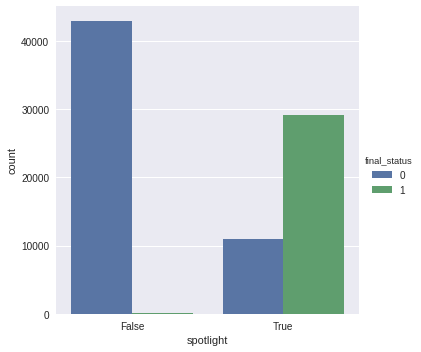

In [62]:
import seaborn as sns 
import matplotlib as plt
%matplotlib inline

sns.factorplot(x="spotlight", hue="final_status",
                  data=merged_train, kind="count",
                   size=5, aspect=1);

In [63]:
max_depth = 7
min_samples_split = 5

dtree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1, criterion='entropy')
dtree_two = dtree_two.fit(X_train, y_train)  # fitting/training the tree classifier

print(dtree_two.feature_importances_)
print(dtree_two.score(X_test, y_test))

[  2.61412283e-04   9.12081774e-02   0.00000000e+00   0.00000000e+00
   6.01361641e-02   4.95459940e-04   1.90480791e-04   0.00000000e+00
   0.00000000e+00   6.45343727e-02   2.47811887e-04   1.12440733e-04
   7.82813680e-01]
0.897111913357


In [64]:
# make predictions
expected = y_test
predicted_dt = dtree_two.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted_dt))

             precision    recall  f1-score   support

          0       0.97      0.87      0.92     10749
          1       0.80      0.94      0.87      5871

avg / total       0.91      0.90      0.90     16620



In [65]:
print(metrics.confusion_matrix(expected, predicted_dt))

[[9365 1384]
 [ 326 5545]]


# 2. RandomForest Classifier

the Random Forest technique handles the overfitting problem you faced with decision trees. It grows multiple (very deep) classification trees using the training set. <b>At the time of prediction, each tree is used to come up with a prediction and every outcome is counted as a vote</b>. For example, if you have trained 3 trees with 2 saying a passenger in the test set will survive and 1 says he will not, the passenger will be classified as a survivor. This approach of overtraining trees, but having the majority's vote count as the actual classification decision, avoids overfitting.


bagging and random forests - Averages predictions from a base set of models, can have difficulty making predictions near 0 and 1 because variance in the underlying base models will bias predictions that should be near zero or one away from these values.

In [66]:
from sklearn.ensemble import RandomForestClassifier

# features = train_copy[["goal", "goal_log", "backers_count", "creation_to_launch", "project_duration"]].values
# target = train_copy["final_status"].values

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1) # initializing classifier
my_forest = forest.fit(X_train, y_train)  # fitting/training the classifier

# Print the score of the fitted random forest
print(my_forest.score(X_test, y_test))   # for calculating the mean accuracy of the model.



0.895487364621


In [67]:
# make predictions
expected = y_test
predicted_rf = my_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted_rf))


             precision    recall  f1-score   support

          0       0.99      0.85      0.91     10749
          1       0.78      0.98      0.87      5871

avg / total       0.91      0.90      0.90     16620



In [68]:
print(metrics.confusion_matrix(expected, predicted_rf))

[[9122 1627]
 [ 110 5761]]


# 3. kNN 



In [69]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn_trained = knn.fit(X_train, y_train)

print(knn_trained.score(X_test, y_test))

0.678880866426


In [70]:
# make predictions
expected = y_test
predicted_knn = knn_trained.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted_knn))


             precision    recall  f1-score   support

          0       0.74      0.79      0.76     10749
          1       0.55      0.48      0.52      5871

avg / total       0.67      0.68      0.67     16620



In [71]:
print(metrics.confusion_matrix(expected, predicted_knn))

[[8449 2300]
 [3037 2834]]


# 4. Naive Bayes

In [72]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
nb = GaussianNB()
nb.fit(X_train, y_train)
# print(nb)

# make predictions
expected = y_test
predicted_nb = nb.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted_nb))


             precision    recall  f1-score   support

          0       1.00      0.80      0.89     10749
          1       0.73      1.00      0.84      5871

avg / total       0.90      0.87      0.87     16620



In [73]:
print(metrics.confusion_matrix(expected, predicted_nb))

[[8566 2183]
 [  20 5851]]


In [74]:
nb.score(X_test, y_test)

0.86744885679903727

# 5 Neural Network 

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import advanced_activations  # all the available activation functions e.g. relu, 


# the basic params for deep learning network
FEATURE_NUM = 13   # the input dimension - no of features == input layer nodes.
CLASSES = 1  # binary classification problem - successful 1 or failed 0 projects - has to be one i.e. size of output layer.
HIDDEN1_SIZE = 50
HIDDEN2_SIZE = 25
MAX_RANGE = 100

model = Sequential()  # The Sequential model is a linear stack of layers.
model.add(Dense(HIDDEN1_SIZE, input_dim=FEATURE_NUM, kernel_initializer='uniform'))  # next to input layer.
model.add(advanced_activations.ELU(alpha=1.0))  # adds activation to the last specified layer 
model.add(Dropout(0.6))

model.add(Dense(HIDDEN2_SIZE, kernel_initializer='uniform'))  # # after the first layer, you don't need to specify

# the output layer - for binary classification it has 1 node.
model.add(advanced_activations.ELU(alpha=1.0))
model.add(Dropout(0.6))
model.add(Dense(CLASSES, kernel_initializer='uniform', activation='softmax'))  # output layer - NUmber of classes

In [84]:
checkpointer = ModelCheckpoint(filepath="/tmp/weights_data_three.hdf5",
                               verbose=1,
                               save_best_only=True)

In [85]:
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=False)

In [86]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam', # sgd, 
              metrics=['accuracy'])  

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                700       
_________________________________________________________________
elu_3 (ELU)                  (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
elu_4 (ELU)                  (None, 25)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 26        
Total para

In [87]:
# Epoch 100, batch size 50, optimizer Adam, loss binary_crossentropy
model.fit(X_train, y_train,
#           nb_epoch =MAX_RANGE,  # 100 number of iteration 
          epochs=10,
#           batch_size=1000,
          batch_size=500,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, tensorboard])

/home/nahmed/anaconda2/lib/python2.7/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 66476 samples, validate on 16620 samples
Epoch 1/10
66476/66476 [==============================] - 1s - loss: 10.3416 - acc: 0.3513 - val_loss: 10.3108 - val_acc: 0.3532
Epoch 2/10
66476/66476 [==============================] - 1s - loss: 10.3416 - acc: 0.3513 - val_loss: 10.3108 - val_acc: 0.3532
Epoch 3/10
66476/66476 [==============================] - 1s - loss: 10.3416 - acc: 0.3513 - val_loss: 10.3108 - val_acc: 0.3532
Epoch 4/10
66476/66476 [==============================] - 1s - loss: 10.3416 - acc: 0.3513 - val_loss: 10.3108 - val_acc: 0.3532
Epoch 5/10
66476/66476 [==============================] - 1s - loss: 10.3416 - acc: 0.3513 - val_loss: 10.3108 - val_acc: 0.3532
Epoch 6/10
66476/66476 [==============================] - 1s - loss: 10.3416 - acc: 0.3513 - val_loss: 10.3108 - val_acc: 0.3532
Epoch 7/10
66476/66476 [==============================] - 1s - loss: 10.3416 - acc: 0.3513 - val_loss: 10.3108 - val_acc: 0.3532
Epoch 8/10
66476/66476 [=======================

In [88]:
score, accuracy = model.evaluate(X_test, y_test, batch_size=50)  # separate evaluation call.
print(score)
print(accuracy)

15800/16620 [===========================>..] - ETA: 0s 10.3107514143
0.353249097492


In [92]:
# model.get_weights()[:1]

# Run 2

In [93]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)

model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=10,
          batch_size=1000,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, tensorboard])

Train on 66476 samples, validate on 16620 samples
Epoch 1/10
66476/66476 [==============================] - 1s - loss: 0.6487 - acc: 0.3513 - val_loss: 0.6468 - val_acc: 0.3532
Epoch 2/10
66476/66476 [==============================] - 1s - loss: 0.6487 - acc: 0.3513 - val_loss: 0.6468 - val_acc: 0.3532
Epoch 3/10
66476/66476 [==============================] - 1s - loss: 0.6487 - acc: 0.3513 - val_loss: 0.6468 - val_acc: 0.3532
Epoch 4/10
66476/66476 [==============================] - 1s - loss: 0.6487 - acc: 0.3513 - val_loss: 0.6468 - val_acc: 0.3532
Epoch 5/10
66476/66476 [==============================] - 1s - loss: 0.6487 - acc: 0.3513 - val_loss: 0.6468 - val_acc: 0.3532
Epoch 6/10
66476/66476 [==============================] - 1s - loss: 0.6487 - acc: 0.3513 - val_loss: 0.6468 - val_acc: 0.3532
Epoch 7/10
66476/66476 [==============================] - 1s - loss: 0.6487 - acc: 0.3513 - val_loss: 0.6468 - val_acc: 0.3532
Epoch 8/10
66476/66476 [==============================] - 1s 